## Aula 2 - Representação de imagens, quantização, sistemas de cores, conversão colorido-escala de cinza

Vamos explorar a forma que imagens são representadas, mostradas e armazenadas em computadores. 

### 2.1 Representação

Vamos importar as bibliotecas necessárias e carregar a imagem de teste:

In [82]:
%matplotlib inline
import cv2 # OpenCV
import matplotlib.pyplot as plt # Matplotlib
import numpy as np # Numpy

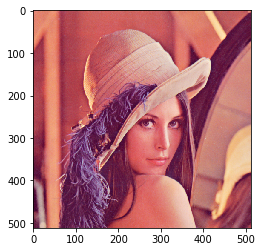

In [83]:
img = plt.imread('lenna.jpg')
plt.imshow(img)

Acima temos a nossa imagem de testes. O método [imread()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imread.html) é responsável por carregar uma imagem que está no disco para uma variável na memória. Podemos analisar a forma que essa imagem é representada através do atributo [shape](https://docs.scipy.org/doc/numpy-1.14.5/reference/generated/numpy.ndarray.shape.html).

O atributo shape está disponível para qualquer elemento do tipo ndarray (uma array do numpy). A matriz é um vetor de vetores, logo também possui esse atributo.

In [84]:
img.shape

(512, 512, 3)

O atributo shape nos retorna uma n-tupla, onde os nosso elementos são arranjados da seguinte forma:

(largura, altura, profundidade)

A largura e a altura são a própria largura e altura da imagem, e a profundidade nos diz a quantidade de canais de cor que está sendo usado nessa imagem. Nesse caso temos 3 canais, pois trabalhamos com uma imagem RGB.

Podemos ver a contribuição de cada canal ao mostrarmos a imagem isolando cada um dos 3 canais da profundidade:

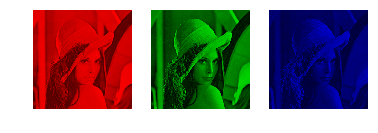

In [85]:
figure, plots = plt.subplots(ncols=3, nrows=1)

for i, subplot in zip(range(3), plots):
    temp = np.zeros((512, 512, 3), dtype='uint8')
    temp[:,:,i] = img[:,:,i]

    subplot.imshow(temp)
    subplot.set_axis_off()
plt.show()

Podemos acessar as informações da imagem como fazemos acesso de matrizes, assim como também podemos manipular as imagens com técnicas de manipulação de matrizes.

Por exemplo: quais são os valores RGB no pixel (100, 100)?

In [86]:
r, g, b = img[100, 100]
print("Valor de R: %d\nValor de G: %d\nValor de B: %d\n" % (r, g, b))

Valor de R: 178
Valor de G: 68
Valor de B: 78



O que acontece, então, se mudarmos os valores desse ponto na matriz? Mudar só um ponto não ficaria bem visível, então vamos fazer o acesso desde (0, 0) até (100, 100):

In [87]:
print(img[0:100, 0:100].shape)
img[0:100, 0:100] = (255, 255, 255)
plt.imshow(img)

(100, 100, 3)


ValueError: assignment destination is read-only

Podemos ver que o código nos retornou um **ValueError** com o motivo de que a variável está definida como somente leitura. Isso é uma proteção para evitar que a imagem seja alterada acidentalmente. Note o valor de WRITEABLE na tablea abaixo:

In [88]:
img.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : False
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [89]:
img.setflags(write=1)

In [90]:
img.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

(100, 100, 3)


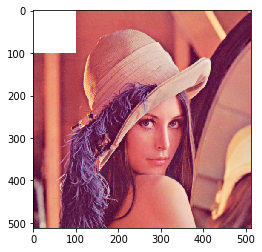

In [91]:
print(img[0:100, 0:100].shape)
img[0:100, 0:100] = (255, 255, 255)
plt.imshow(img)

Apagamos todos os pixels entre (0, 0) e (100, 100) na imagem. Qualquer pixel pode ser acessado e modificado como acessamos e modificamos elementos de matrizes comuns.

### 2.2 Quantização

### 2.3 Sistemas de cores

Vamos fazer um breve estudo sobre os sistemas **RGB**, **LAB**, **YCrCb** e **HSV**.

#### 2.3.1 RGB

O RGB é o sistema padrão. Temos a representação por 3 canais: R, G e B.

(512, 512, 3)

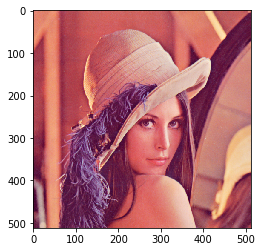

In [92]:
img = plt.imread('lenna.jpg')
plt.imshow(img)
img.shape

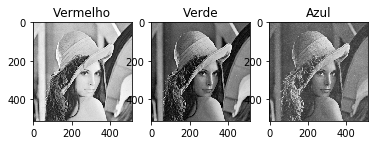

In [93]:
plt.subplot(2,3,4)
plt.imshow(img[:,:,0],cmap="gray")
plt.title('Vermelho')
plt.subplot(2,3,5)
plt.imshow(img[:,:,1],cmap="gray")
plt.title('Verde')
plt.subplot(2,3,6)
plt.imshow(img[:,:,2],cmap="gray")
plt.title('Azul')
plt.show()

#### 2.3.2 LAB

O sistema de cores LAB também possui 3 componentes, representados por:

1. L: intensidade da luz;
2. A: a cor variando de verde para magenta;
3. B: a cor variando de azul para amarelo.

Podemos converter uma imagem de RGB para LAB usando o OpenCV:

(512, 512, 3)

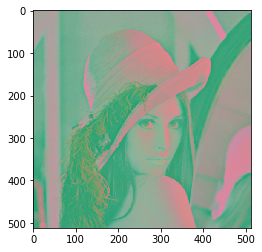

In [94]:
img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
plt.imshow(img_lab)
img_lab.shape

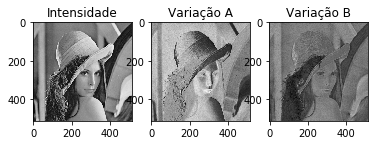

In [95]:
plt.subplot(2,3,4)
plt.imshow(img_lab[:,:,0],cmap="gray")
plt.title('Intensidade')
plt.subplot(2,3,5)
plt.imshow(img_lab[:,:,1],cmap="gray")
plt.title('Variação A')
plt.subplot(2,3,6)
plt.imshow(img_lab[:,:,2],cmap="gray")
plt.title('Variação B')
plt.show()

#### 2.3.3 YCrCb

O YCrCb é derivado do RGB e também tem 3 canais:

1. Y: luminância;
2. Cr: R-Y (a distância de R da luminância);
3. Cb: B-Y (a distância de B da luminância);

Vamos converter a imagem original de RGB para YCrCb usando o OpenCV:

(512, 512, 3)

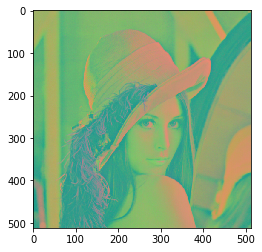

In [96]:
img_ycrcb = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
plt.imshow(img_ycrcb)
img_ycrcb.shape

Novamente, vamos verificar cada canal:

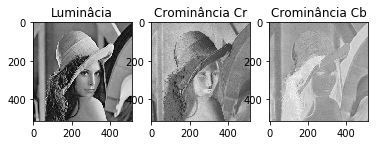

In [97]:
plt.subplot(2,3,4)
plt.imshow(img_ycrcb[:,:,0],cmap="gray")
plt.title('Luminâcia')
plt.subplot(2,3,5)
plt.imshow(img_ycrcb[:,:,1],cmap="gray")
plt.title('Crominância Cr')
plt.subplot(2,3,6)
plt.imshow(img_ycrcb[:,:,2],cmap="gray")
plt.title('Crominância Cb')
plt.show()

#### 2.3.4 HSV

O HSV também possui 3 canais:

1. H: Tonalidade;
2. S: Saturação;
3. V: Valor.

Uma boa coisa sobre o HSV é que ele usa apenas um canal para especificar a cor, tornando-o mais intuitivo para esse caso.

Novamente, vamos converter a imagem original para HSV:

(512, 512, 3)

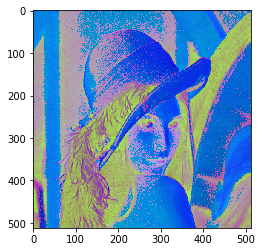

In [98]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(img_hsv)
img_hsv.shape

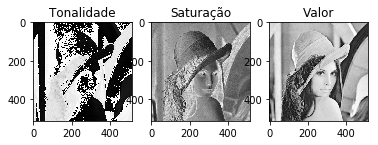

In [99]:
plt.subplot(2,3,4)
plt.imshow(img_hsv[:,:,0],cmap="gray")
plt.title('Tonalidade')
plt.subplot(2,3,5)
plt.imshow(img_hsv[:,:,1],cmap="gray")
plt.title('Saturação')
plt.subplot(2,3,6)
plt.imshow(img_hsv[:,:,2],cmap="gray")
plt.title('Valor')
plt.show()

### 2.4 Conversão colorido-escala de cinza

A conversão de colorido para escala de cinza também pode ser feito através do OpenCV, da seguinte maneira:

(512, 512)

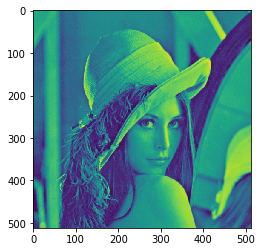

In [100]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray)
img_gray.shape

Como a imagem só tem um canal (note o resultado do atributo **shape** acima), o matplotlib a interpreta como um [mapa de calor](https://en.wikipedia.org/wiki/Heat_map). Precisamos, então, converter essa imagem para RGB para que os 3 canais voltem. A imagem continuará em tons de cinza, porém cada canal terá uma "cópia" da imagem: 

(512, 512, 3)

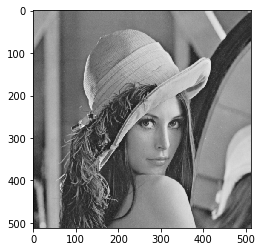

In [101]:
img_gray = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB)
plt.imshow(img_gray)
img_gray.shape

In [102]:
r, g, b = img_gray[100, 100]
print("Valor de R: %d\nValor de G: %d\nValor de B: %d\n" % (r, g, b))

Valor de R: 102
Valor de G: 102
Valor de B: 102



A conversão de RGB para grayscale é a mais fácil de todas. Que tal fazermos uma função para realizar essa conversão?

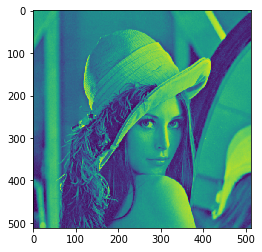

In [103]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img_gray_2 = rgb2gray(img)
plt.imshow(img_gray_2)

A fórmula para a conversão da imagem para RGB é:

`Y' = 0.299 R + 0.587 G + 0.114 B`

Simplificamos muito o cálculo usando o método [np.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html). O retorno da função é o produto escalar da imagem pelo vetor dos pesos.